In [1]:
import os
data_dir = r"C:\Users\akhta\Downloads\Downloads 2025\Self Development\Projects\DermalScan\Dermal Scan Main\dataset_clean"
classes = ["wrinkles", "dark spots", "puffy eyes", "clear skin"]

counts = {}   

for c in classes:
    folder = os.path.join(data_dir, c)
    
    img_count = len([file for file in os.listdir(folder) if file.lower().endswith(('.jpg', '.png', '.jpeg'))])
    counts[c] = img_count

print(counts)


{'wrinkles': 300, 'dark spots': 303, 'puffy eyes': 300, 'clear skin': 300}


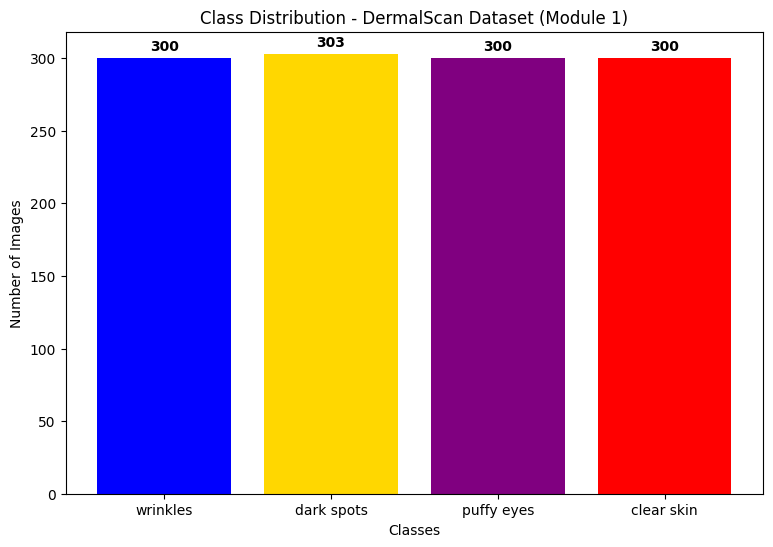

In [26]:
import matplotlib.pyplot as plt

labels = list(counts.keys())
values = list(counts.values())


colors = ['blue', 'gold', 'purple', 'red']

plt.figure(figsize=(9,6))
bars = plt.bar(labels, values, color=colors)

plt.title("Class Distribution - DermalScan Dataset (Module 1)")
plt.xlabel("Classes")
plt.ylabel("Number of Images")


for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 3, 
        f"{height}",
        ha='center', va='bottom', fontsize=10, fontweight='bold'
    )

plt.show()


Total images loaded: 1203
Image data shape: (1203, 224, 224, 3)
Label data shape: (1203,)


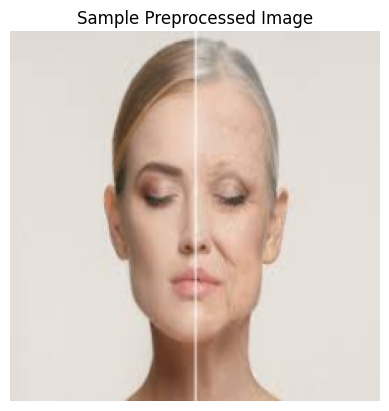

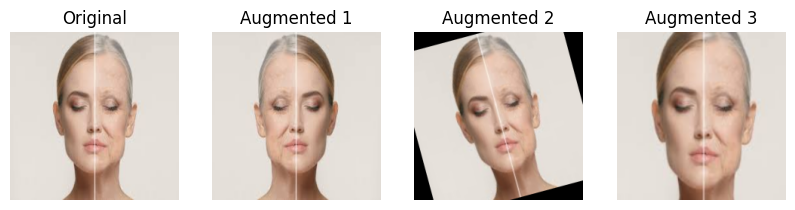

One-hot label shape: (1203, 4)

Tensorflow Version: 2.15.0
Found 963 images belonging to 4 classes.
Found 240 images belonging to 4 classes.

Class Mapping: {'clear skin': 0, 'dark spots': 1, 'puffy eyes': 2, 'wrinkles': 3}



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                             

c:\Users\akhta\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


61/61 [==============================] - ETA: 0s - loss: 1.4204 - accuracy: 0.2617
Epoch 2: val_accuracy did not improve from 0.28750
61/61 [==============================] - 14s 228ms/step - loss: 1.4204 - accuracy: 0.2617 - val_loss: 1.3931 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 3/25
61/61 [==============================] - ETA: 0s - loss: 1.4140 - accuracy: 0.2638
Epoch 3: val_accuracy did not improve from 0.28750
61/61 [==============================] - 14s 228ms/step - loss: 1.4140 - accuracy: 0.2638 - val_loss: 1.4021 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 4/25
61/61 [==============================] - ETA: 0s - loss: 1.4317 - accuracy: 0.2347
Epoch 4: val_accuracy did not improve from 0.28750

Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
61/61 [==============================] - 14s 229ms/step - loss: 1.4317 - accuracy: 0.2347 - val_loss: 1.3965 - val_accuracy: 0.2500 - lr: 0.0010
Epoch 5/25
61/61 [==============================] - ETA: 0s - lo

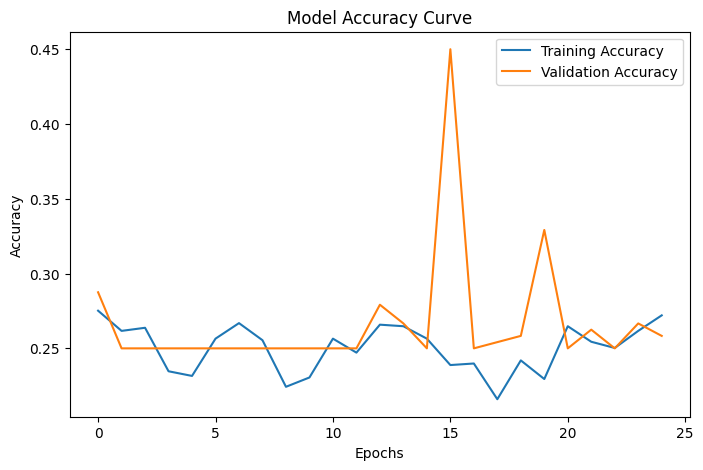

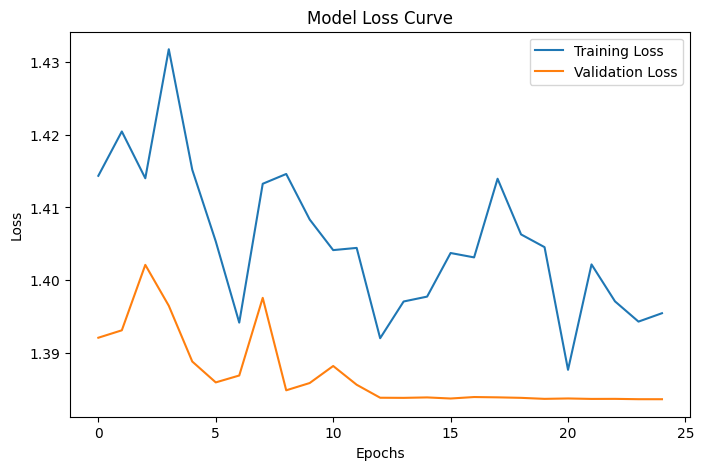

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
data_dir = r"C:\Users\akhta\Downloads\Downloads 2025\Self Development\Projects\DermalScan\Dermal Scan Main\dataset_clean"

classes = ["wrinkles", "dark spots", "puffy eyes", "clear skin"]
img_size = 224
X = []
y = []

for idx, cls in enumerate(classes):
    folder_path = os.path.join(data_dir, cls)
    
    for img_name in os.listdir(folder_path):
        if img_name.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, img_name)
            
            img = cv2.imread(img_path)
            if img is None:
                continue
            
            img = cv2.resize(img, (img_size, img_size))
            X.append(img)
            y.append(idx)

print("Total images loaded:", len(X))
X = np.array(X, dtype="float32") / 255.0
y = np.array(y)

print("Image data shape:", X.shape)
print("Label data shape:", y.shape)
sample_img = (X[0] * 255).astype("uint8")
sample_img = cv2.cvtColor(sample_img, cv2.COLOR_BGR2RGB)

plt.imshow(sample_img)
plt.title("Sample Preprocessed Image")
plt.axis("off")
plt.show()
def augment_image(img):
    augmented = []
    
    # horizontal flip
    augmented.append(cv2.flip(img, 1))
    
    # rotate
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), 15, 1)
    augmented.append(cv2.warpAffine(img, M, (w, h)))
    
    # zoom
    zoom = img[20:200, 20:200]
    zoom = cv2.resize(zoom, (img_size, img_size))
    augmented.append(zoom)
    
    return augmented
original = (X[0] * 255).astype("uint8")
augmented_imgs = augment_image(original)

plt.figure(figsize=(10,4))

plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

for i, aug in enumerate(augmented_imgs):
    plt.subplot(1,4,i+2)
    plt.imshow(cv2.cvtColor(aug, cv2.COLOR_BGR2RGB))
    plt.title(f"Augmented {i+1}")
    plt.axis("off")

plt.show()
num_classes = len(classes)

y_onehot = np.zeros((y.shape[0], num_classes))
for i, label in enumerate(y):
    y_onehot[i, label] = 1

print("One-hot label shape:", y_onehot.shape)

# MODULE 3

import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

print("Tensorflow Version:", tf.__version__)


data_dir = r"C:\Users\akhta\Downloads\Downloads 2025\Self Development\Projects\DermalScan\Dermal Scan Main\dataset_clean"

img_size = 224
batch_size = 16
num_classes = 4


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False,
    subset='validation'
)

print("\nClass Mapping:", train_gen.class_indices)


base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False

x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.4)(x)
output_layer = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=output_layer)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()


callbacks = [
    EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint("best_dermalscan_model.h5", monitor="val_accuracy", save_best_only=True, verbose=1),
    ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=3, verbose=1)
]

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25,
    callbacks=callbacks
)


base_model.trainable = True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

print("\nFine tuning model...")
history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    callbacks=callbacks
)


model.save("DermalScan_Final_Model.h5")
print("Model Saved Successfully!")


plt.figure(figsize=(8,5))
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Curve")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Curve")
plt.legend()
plt.show()

